## Black Friday Sales Prediction
Predicting Black Friday sales is crucial for retailers to optimize inventory and marketing strategies. This dataset contains information about customer demographics, product categories, purchase amounts, and more. By leveraging this data, machine learning models can be trained to forecast sales trends and make data-driven decisions. Factors such as customer age, gender, marital status, and product category preferences may influence purchase behavior. Additionally, historical Black Friday sales data can be used to identify patterns and seasonality, enabling accurate predictions. Ultimately, this predictive analysis can guide retailers in targeting specific customer segments and tailoring promotions to maximize revenue during this high-stakes shopping event.

## Importing Nassaries Libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# Load train dataset 

In [2]:
df_train = pd.read_csv(r"C:\Users\Dell\Downloads\black firday sales\train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#check data shape 
df_train.shape

(550068, 12)

In [4]:
#check duplicate values
df_train.duplicated().sum()

0

In [5]:
#checking missing values
df_train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<AxesSubplot:>

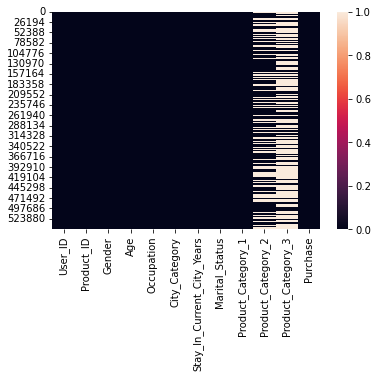

In [6]:
#visualazation null values using heatmap
sns.heatmap(df_train.isna())

In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [13]:
#fill the null values 
df_train["Product_Category_2"] = df_train["Product_Category_2"].fillna(df_train["Product_Category_2"].median())
df_train["Product_Category_3"] = df_train["Product_Category_3"].fillna(df_train["Product_Category_3"].median())

In [14]:
df_train.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [16]:
# unique values check by each of column
for i in df_train.columns:
    print(i)
    print(df_train[i].unique())

User_ID
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender
['F' 'M']
Age
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category
['A' 'C' 'B']
Stay_In_Current_City_Years
['2' '4+' '3' '1' '0']
Marital_Status
[0 1]
Product_Category_1
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2
[ 9.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12. 10. 17. 13.  7. 18.]
Product_Category_3
[14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase
[ 8370 15200  1422 ...   135   123   613]


## Data Visualization for data adastaning perfuse.

In [17]:
df_train.describe(include="object").columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

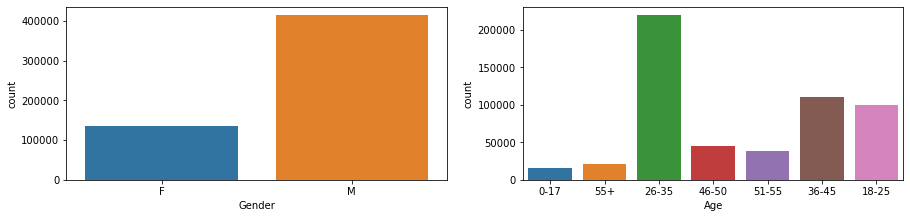

In [18]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.countplot(df_train["Gender"])


plt.subplot(2,2,2)
sns.countplot(df_train["Age"])
plt.show()



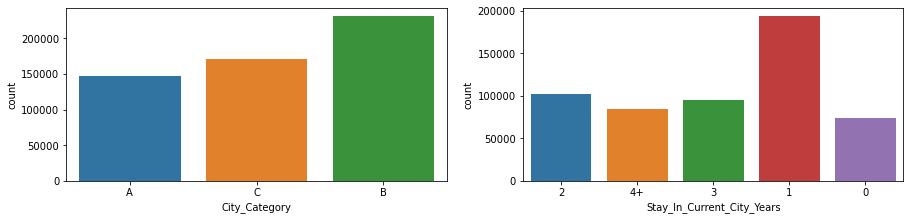

In [19]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.countplot(df_train["City_Category"])


plt.subplot(2,2,2)
sns.countplot(df_train["Stay_In_Current_City_Years"])
plt.show()


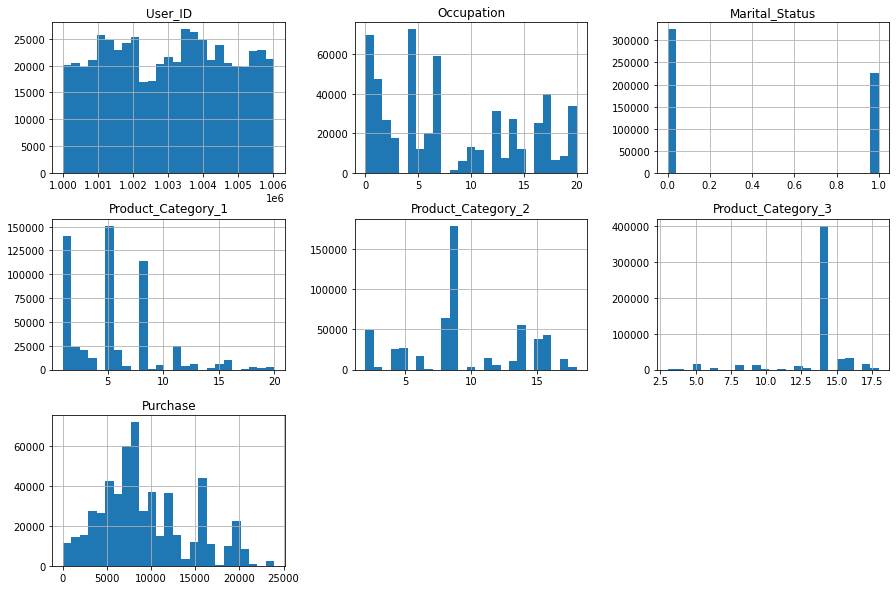

In [20]:
df_train.hist(bins=25,figsize=(15,10))
plt.show()

## OrdinalEncoder

In [22]:
# categorical caonvert to numberical data appling one hot codding tecknies

cat_col = ['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import OrdinalEncoder

encoding = OrdinalEncoder()
df_train[cat_col] = encoding.fit_transform(df_train[cat_col])
 

In [23]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0.0,0.0,10,0.0,2.0,0,3,9.0,14.0,8370
1,1000001,P00248942,0.0,0.0,10,0.0,2.0,0,1,6.0,14.0,15200


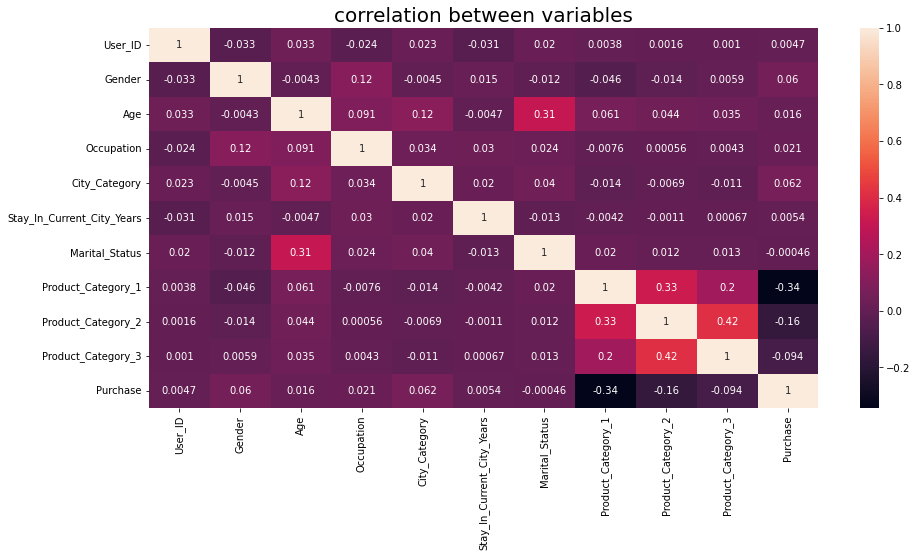

In [137]:
plt.figure(figsize=(15,7))
sns.heatmap(df_train.corr(),annot=True)
plt.title("correlation between variables",size=20)
plt.show()

## x,y defind

In [25]:
x = df_train.iloc[:,2:-1]
y = df_train["Purchase"]

In [26]:
x.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.0,0.0,10,0.0,2.0,0,3,9.0,14.0
1,0.0,0.0,10,0.0,2.0,0,1,6.0,14.0
2,0.0,0.0,10,0.0,2.0,0,12,9.0,14.0
3,0.0,0.0,10,0.0,2.0,0,12,14.0,14.0
4,1.0,6.0,16,2.0,4.0,0,8,9.0,14.0


In [27]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

## Train_Test_Split

In [28]:
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=43)
print(xtrain.shape)
print(xtest.shape)

(385047, 9)
(165021, 9)


## ML Model building

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Lr = LinearRegression()
Lr.fit(xtrain,ytrain)

y_pred = Lr.predict(xtest)


print(mean_absolute_error(ytest,y_pred))
print(mean_squared_error(ytest,y_pred))
print(np.sqrt(mean_squared_error(ytest,y_pred)))
print(r2_score(ytest,y_pred))



3588.1496415714623
21972638.665007774
4687.49812426712
0.12800860993932384


## StandardScaler for data normalization.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [31]:
xtrain.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.571273,1.851862,-1.086166,1.258053,-1.440566,-0.831728,-0.102136,-0.137249,0.171369
1,-1.750475,1.112438,-1.086166,-0.056341,0.110807,-0.831728,-0.102136,-0.373790,-0.678602
2,0.571273,0.373014,-0.166679,-1.370736,-0.664880,-0.831728,0.660738,1.045455,0.171369
3,0.571273,-0.366410,-0.932918,-1.370736,-1.440566,-0.831728,-1.119301,-0.373790,0.171369
4,0.571273,-0.366410,1.825541,-1.370736,0.110807,1.202317,1.423612,-0.137249,0.171369


In [32]:
xtest.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.571273,-1.105834,-0.626423,-0.056341,-0.664880,1.202317,0.660738,-0.137249,0.171369
1,0.571273,-0.366410,-1.239413,-1.370736,1.662180,-0.831728,0.406447,-0.137249,0.171369
2,0.571273,-0.366410,1.825541,-1.370736,0.110807,-0.831728,-0.102136,-0.137249,0.171369
3,-1.750475,-0.366410,-1.239413,-0.056341,0.110807,1.202317,-0.102136,1.045455,1.021339
4,0.571273,0.373014,0.446312,1.258053,1.662180,1.202317,0.152155,0.099291,1.021339


## 1. LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Lr = LinearRegression()
Lr.fit(xtrain,ytrain)

y_pred = Lr.predict(xtest)


print(mean_absolute_error(ytest,y_pred))
print(mean_squared_error(ytest,y_pred))
print(np.sqrt(mean_squared_error(ytest,y_pred)))
print(r2_score(ytest,y_pred))

3588.1496415714623
21972638.665007774
4687.49812426712
0.12800860993932384


In [34]:
ytest[:10]

273731     7848
206530    20736
271860     8674
170162     5406
412155    16096
455831    15874
390336     7103
234108     5373
188243     7976
114036    11908
Name: Purchase, dtype: int64

In [35]:
y_pred[:10]

array([ 8084.79538187,  8299.34153691,  9262.81988597,  8609.26208749,
        9468.56006031, 11461.18950539,  9490.41346863,  9041.08018675,
        7995.5911538 , 11361.36584349])

<AxesSubplot:xlabel='Purchase'>

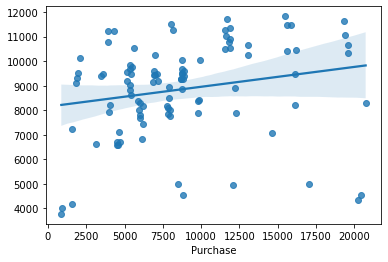

In [37]:
sns.regplot(ytest[:100],y_pred[:100])

## 2. Neural Network

In [42]:
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [43]:
nn = Sequential()

In [44]:
nn.add(Dense(128,input_dim=xtrain.shape[1],activation="relu"))
nn.add(Dense(64,activation="relu"))
nn.add(Dense(1,activation="linear"))

In [45]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


## Compile

In [46]:
nn.compile(loss="mse",optimizer="adam",metrics=["mae"])

In [47]:
hist = nn.fit(xtrain,ytrain,validation_split=0.3,epochs=20)

Epoch 1/20
8423/8423 [==============================] - 41s 5ms/step - loss: 24321370.0000 - mae: 3647.8613 - val_loss: 18972036.0000 - val_mae: 3241.5093
Epoch 2/20
8423/8423 [==============================] - 38s 5ms/step - loss: 18521682.0000 - mae: 3189.8879 - val_loss: 18028144.0000 - val_mae: 3125.4355
Epoch 3/20
8423/8423 [==============================] - 38s 5ms/step - loss: 17900900.0000 - mae: 3103.5884 - val_loss: 17622536.0000 - val_mae: 3066.6267
Epoch 4/20
8423/8423 [==============================] - 38s 4ms/step - loss: 17490196.0000 - mae: 3054.3906 - val_loss: 17126976.0000 - val_mae: 3013.6213
Epoch 5/20
8423/8423 [==============================] - 38s 4ms/step - loss: 16773975.0000 - mae: 2993.6868 - val_loss: 16235242.0000 - val_mae: 2953.8774
Epoch 6/20
8423/8423 [==============================] - 38s 4ms/step - loss: 15917584.0000 - mae: 2946.3860 - val_loss: 15503273.0000 - val_mae: 2911.7297
Epoch 7/20
8423/8423 [==============================] - 38s 5ms/step -

## Learning Curve

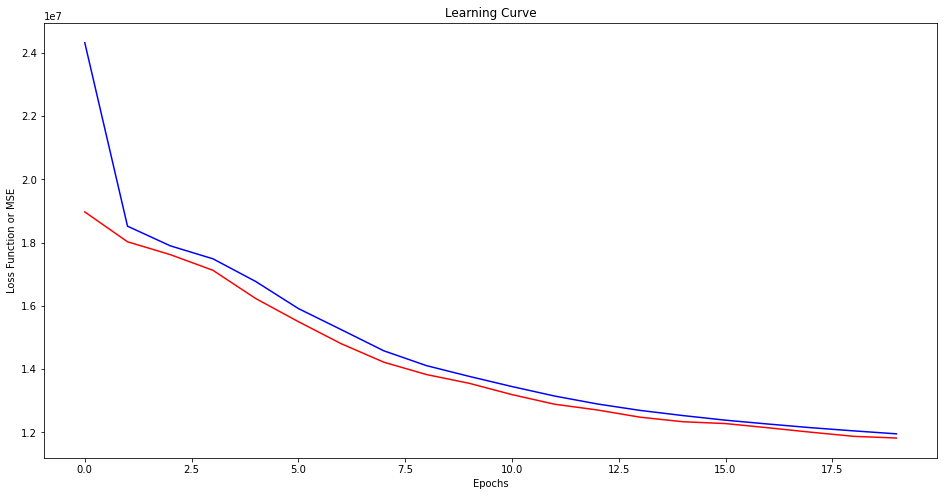

In [135]:
plt.figure(figsize=(16,8))
plt.plot(hist.history["loss"],color= "b")
plt.plot(hist.history["val_loss"],color="r")
plt.xlabel('Epochs')
plt.ylabel('Loss Function or MSE')
plt.title('Learning Curve')
plt.show()

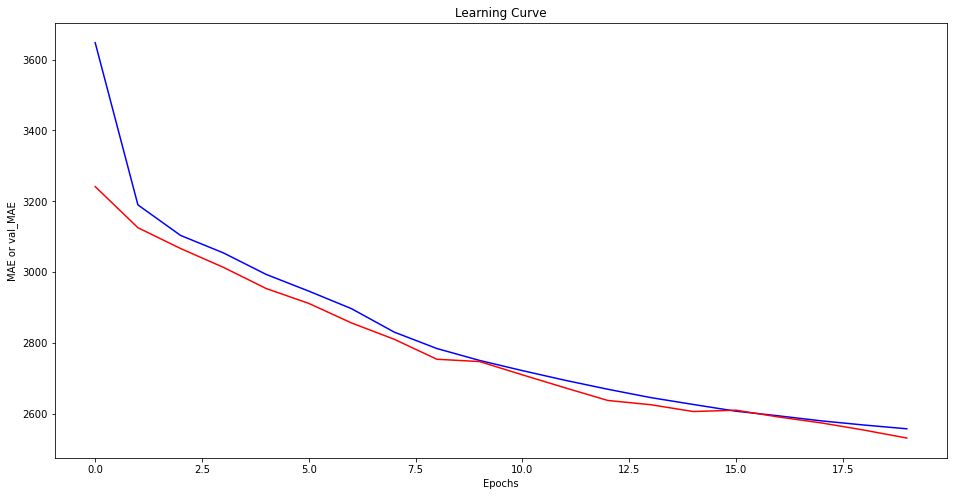

In [134]:
plt.figure(figsize=(16,8))
plt.plot(hist.history["mae"],color = "b")
plt.plot(hist.history["val_mae"],color="r")
plt.xlabel('Epochs')
plt.ylabel('MAE or val_MAE')
plt.title('Learning Curve')
plt.show()

## Evaluate

In [51]:
nn.evaluate(xtrain,ytrain)

12033/12033 [==============================] - 32s 3ms/step - loss: 11887353.0000 - mae: 2538.5452


[11887353.0, 2538.545166015625]

In [52]:
nn.evaluate(xtest,ytest)

5157/5157 [==============================] - 15s 3ms/step - loss: 11841179.0000 - mae: 2534.4595


[11841179.0, 2534.45947265625]

# prediction

In [54]:
y_train_pred = nn.predict(xtrain)
y_test_pred = nn.predict(xtest)

5157/5157 [==============================] - 11s 2ms/step


In [55]:
y_train_pred[:10]

array([[ 6572.4434],
       [ 6796.7656],
       [ 7346.4585],
       [13108.828 ],
       [ 5343.0996],
       [13918.233 ],
       [ 7585.059 ],
       [14390.068 ],
       [14349.032 ],
       [ 7532.059 ]], dtype=float32)

In [58]:
y_test_pred[:10]

array([[ 7542.8086],
       [13757.919 ],
       [ 6350.5684],
       [ 6323.032 ],
       [15639.94  ],
       [13835.197 ],
       [ 6495.865 ],
       [ 6136.386 ],
       [ 7954.06  ],
       [14170.652 ]], dtype=float32)

In [59]:
ytest[:10]

273731     7848
206530    20736
271860     8674
170162     5406
412155    16096
455831    15874
390336     7103
234108     5373
188243     7976
114036    11908
Name: Purchase, dtype: int64

## Metrics

In [63]:
print(mean_absolute_error(ytest,y_test_pred))
print(mean_squared_error(ytest,y_test_pred))
print(np.sqrt(mean_squared_error(ytest,y_test_pred)))
print(r2_score(ytest,y_test_pred))

2534.4623105136934
11841178.341413965
3441.1013268158736
0.5300789441220128


In [64]:
print(mean_absolute_error(ytrain,y_train_pred))
print(mean_squared_error(ytrain,y_train_pred))
print(np.sqrt(mean_squared_error(ytrain,y_train_pred)))
print(r2_score(ytrain,y_train_pred))

2538.5450880912294
11887351.377277799
3447.8038484342173
0.5291224696912427


## Test_datset

In [109]:
test_datset = pd.read_csv(r"C:\Users\Dell\Downloads\black firday sales\test.csv")

In [111]:
test_datset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [112]:
#missing value fill
test_datset["Product_Category_2"] = test_datset["Product_Category_2"].fillna(test_datset["Product_Category_2"].median())
test_datset["Product_Category_3"] = test_datset["Product_Category_3"].fillna(test_datset["Product_Category_3"].median())

In [113]:
# OrdinalEncoder in this liberies is used to convert categorical column to binary numbers

cat_col = ['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import OrdinalEncoder

encoding = OrdinalEncoder()
test_datset[cat_col] = encoding.fit_transform(test_datset[cat_col])

In [115]:
#test data defind
final_test_data = test_datset.iloc[:,2:]

In [119]:
# scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_test_data = pd.DataFrame(scaler.fit_transform(final_test_data),columns=final_test_data.columns)

In [121]:
final_test_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.573575,1.112316,-0.166445,-0.056309,0.110432,1.199419,-1.144571,0.332493,0.171729
1,0.573575,-0.368480,1.367031,1.261046,-1.443264,-0.833737,-0.609292,-1.078842,0.171729
2,-1.743450,0.371918,-1.086530,-0.056309,1.664128,1.199419,-0.074014,1.038161,0.171729
3,-1.743450,0.371918,-1.086530,-0.056309,1.664128,1.199419,-0.341653,-0.137952,0.171729
4,-1.743450,-0.368480,-1.086530,1.261046,-0.666416,-0.833737,-0.341653,-1.078842,-0.677120


## predictiton test data

In [122]:
final_test_data_pred = nn.predict(final_test_data)

7300/7300 [==============================] - 6s 878us/step


In [124]:
# convert Datafram
final_test_data_pred = pd.DataFrame(final_test_data_pred,columns=["Prediction"])

In [125]:
# marge to prediction columne and testdata
final_output = pd.concat([test_datset,final_test_data_pred],axis=1)

In [129]:
final_submission= final_output[["User_ID","Product_ID","Prediction"]]
final_submission.head()

,User_ID,Product_ID,Prediction
0,1000004,P00128942,13603.174805
1,1000009,P00113442,8495.898438
2,1000010,P00288442,7001.810547
3,1000010,P00145342,4122.464355
4,1000011,P00053842,5097.534180


In [130]:
final_submission.to_csv("final_submission.csv",index=False)